In [1]:
import pandas as pd
import numpy as np

In [2]:
df_fall_2024 = pd.read_csv('fall-2024.csv')
print(df_fall_2024.head())

                  Date            Workout Name Duration    Exercise Name  \
0  2024-09-24 17:18:04  Strong 5x5 - Workout A      59m  Squat (Barbell)   
1  2024-09-24 17:18:04  Strong 5x5 - Workout A      59m  Squat (Barbell)   
2  2024-09-24 17:18:04  Strong 5x5 - Workout A      59m  Squat (Barbell)   
3  2024-09-24 17:18:04  Strong 5x5 - Workout A      59m  Squat (Barbell)   
4  2024-09-24 17:18:04  Strong 5x5 - Workout A      59m  Squat (Barbell)   

   Set Order  Weight  Reps  Distance  Seconds Notes  \
0          1     0.0    10       0.0        0   NaN   
1          2    20.0     5       0.0        0   NaN   
2          3    20.0     5       0.0        0   NaN   
3          4    40.0     5       0.0        0   NaN   
4          5    40.0     5       0.0        0   NaN   

                                     Workout Notes  RPE  
0  15 min interval run for warmup, 7 fast 1.5 slow  NaN  
1                                              NaN  NaN  
2                                     

In [3]:
total_workouts = df_fall_2024['Date'].nunique()
print(f'Total number of workouts: {total_workouts}')

Total number of workouts: 28


In [ ]:
# Convert the 'Date' column to datetime
df_fall_2024['Date'] = pd.to_datetime(df_fall_2024['Date'])

# Sort the dataframe by 'Date'
df_fall_2024 = df_fall_2024.sort_values(by='Date')

# Calculate the difference between consecutive dates
df_fall_2024['Date_diff'] = df_fall_2024['Date'].diff().dt.days

# Find the longest gap
longest_gap = df_fall_2024['Date_diff'].max()
longest_gap_index = df_fall_2024['Date_diff'].idxmax()

# Find the start and end dates of the longest gap
gap_start_date = df_fall_2024.iloc[longest_gap_index-15]['Date'] # TODO: why does it need to be 15??? whatever it works for now
gap_end_date = df_fall_2024.iloc[longest_gap_index]['Date']

print(f'Longest gap: {longest_gap} days')
print(f'Gap starts on: {gap_start_date}')
print(f'Gap ends on: {gap_end_date}')

# "At least you went climbing hopefully"

Longest gap: 8.0 days
Gap starts on: 2024-11-11 15:35:57
Gap ends on: 2024-11-20 13:20:07


In [5]:
# Filter the dataframe for rows where 'Set Order' is 1
set_order_1 = df_fall_2024[df_fall_2024['Set Order'] == 1]

# Count occurrences of each exercise
exercise_counts_set_order_1 = set_order_1['Exercise Name'].value_counts().reset_index()
exercise_counts_set_order_1.columns = ['Exercise Name', 'Occurrences']

# Sort by most occurrences to least
exercise_counts_set_order_1 = exercise_counts_set_order_1.sort_values(by='Occurrences', ascending=False)

print(exercise_counts_set_order_1.head(10))

             Exercise Name  Occurrences
0          Squat (Barbell)           17
2    Bench Press (Barbell)            9
3       Pull Up (Assisted)            9
1       Seated Row (Cable)            9
4        Triceps Extension            8
5     Lat Pulldown (Cable)            7
6     Chest Dip (Assisted)            7
7                Chest Fly            6
8   Bench Press (Dumbbell)            5
9  Leg Extension (Machine)            4


In [6]:
# Get the top 5 exercise names
top_5_exercise_names = exercise_counts_set_order_1['Exercise Name'].head(5)

# Filter the dataframe for these exercises
top_5_exercises_df = df_fall_2024[df_fall_2024['Exercise Name'].isin(top_5_exercise_names)].copy()

# Calculate the total weight lifted for each exercise
top_5_exercises_df.loc[:, 'Total Weight'] = top_5_exercises_df['Weight'] * top_5_exercises_df['Reps']

# Sum the total weight lifted for each exercise
total_weight_lifted = top_5_exercises_df.groupby('Exercise Name')['Total Weight'].sum()

print(total_weight_lifted)

Exercise Name
Bench Press (Barbell)     5975.0
Pull Up (Assisted)        7523.0
Seated Row (Cable)       27070.0
Squat (Barbell)          20900.0
Triceps Extension         5717.5
Name: Total Weight, dtype: float64


In [20]:
# Get the top 5 exercise names
bottom_3_exercise_names = exercise_counts_set_order_1.tail(11)

print(bottom_3_exercise_names)

                       Exercise Name  Occurrences
18  Bent Over One Arm Row (Dumbbell)            2
19             Chest Press (Machine)            1
20                            Crunch            1
21                  Cycling (Indoor)            1
22                           Push Up            1
23       Romanian Deadlift (Barbell)            1
24                Elliptical Machine            1
25                Deadlift (Barbell)            1
26              Seated Row (Machine)            1
27           Bent Over Row (Barbell)            1
28                          Ab Wheel            1


In [7]:
import pandas as pd

# Function to convert duration string to total minutes
def convert_duration_to_minutes(duration_str):
    if 'h' in duration_str:
        hours, minutes = duration_str.split('h')
        hours = int(hours.strip())
        minutes = int(minutes.strip().replace('m', ''))
        total_minutes = hours * 60 + minutes
    else:
        total_minutes = int(duration_str.replace('m', '').strip())
    return total_minutes

# Remove duplicate dates
df_unique_dates = df_fall_2024.drop_duplicates(subset='Date')

# Convert 'Duration' to numeric (total minutes)
df_unique_dates['Duration_minutes'] = df_unique_dates['Duration'].apply(convert_duration_to_minutes)

# Calculate average, min, and max duration
avg_duration_unique = df_unique_dates['Duration_minutes'].mean()
min_duration_unique = df_unique_dates['Duration_minutes'].min()
max_duration_unique = df_unique_dates['Duration_minutes'].max()

print(f'Average Duration: {avg_duration_unique} minutes')
print(f'Minimum Duration: {min_duration_unique} minutes')
print(f'Maximum Duration: {max_duration_unique} minutes')

# Get date of min and max
min_duration_date = df_unique_dates[df_unique_dates['Duration_minutes'] == min_duration_unique]['Date']
max_duration_date = df_unique_dates[df_unique_dates['Duration_minutes'] == max_duration_unique]['Date']

print(f'Date of Minimum Duration: {min_duration_date.values[0]}')
print(f'Date of Maximum Duration: {max_duration_date.values[0]}')

Average Duration: 41.035714285714285 minutes
Minimum Duration: 17 minutes
Maximum Duration: 72 minutes
Date of Minimum Duration: 2024-12-03T14:44:49.000000000
Date of Maximum Duration: 2024-10-11T12:24:17.000000000


/var/folders/jl/__k988wj4pl596v9ztzvw4fc0000gn/T/ipykernel_11944/2176113813.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique_dates['Duration_minutes'] = df_unique_dates['Duration'].apply(convert_duration_to_minutes)


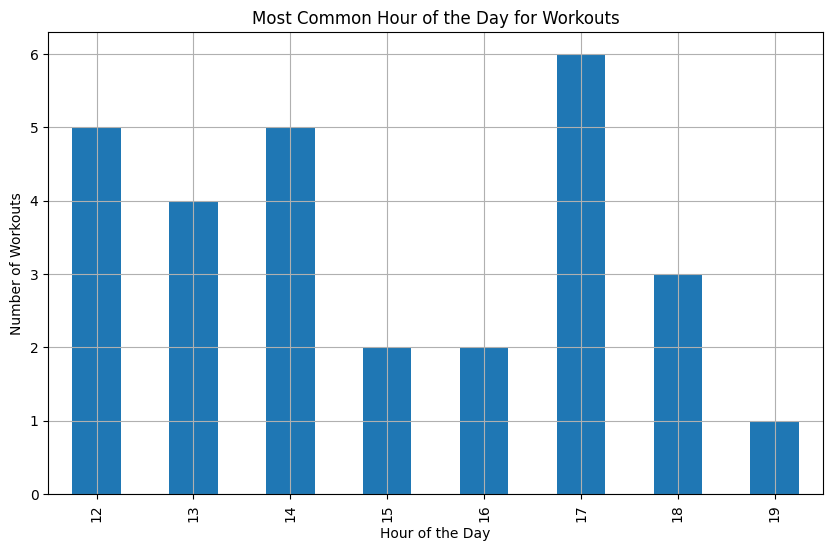

In [13]:
import matplotlib.pyplot as plt

# Extract the hour from the 'Date' column
df_unique_dates['Hour'] = df_unique_dates['Date'].dt.hour

# Count the occurrences of each hour
hour_counts = df_unique_dates['Hour'].value_counts().sort_index()

# Plot the results
plt.figure(figsize=(10, 6))
hour_counts.plot(kind='bar')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Workouts')
plt.title('Most Common Hour of the Day for Workouts')
plt.grid(True)
plt.show()

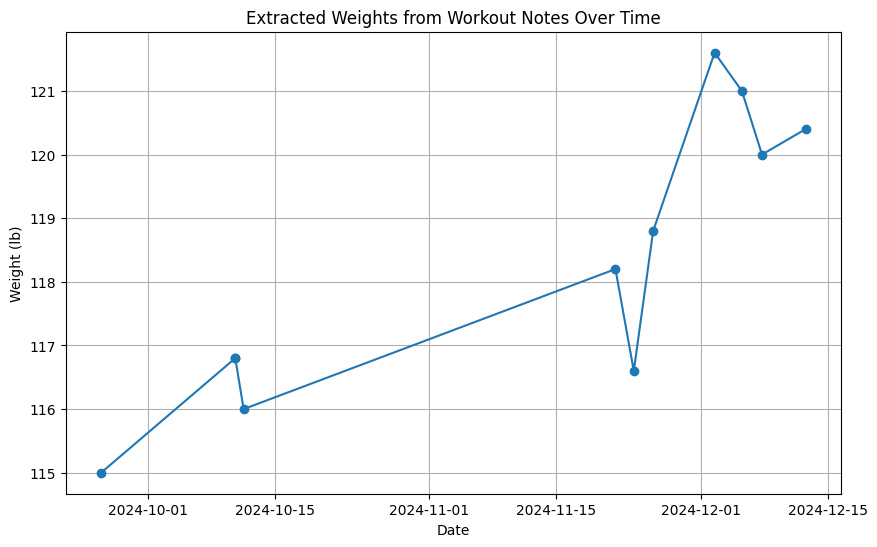

In [8]:
import matplotlib.pyplot as plt

# Extract weights from workout notes
df_fall_2024['Extracted Weight'] = df_fall_2024['Workout Notes'].str.extract(r'(\d+\.?\d*)\s?lb', expand=False).astype(float)

# Drop rows with NaN values in 'Extracted Weight'
df_fall_2024_cleaned = df_fall_2024.dropna(subset=['Extracted Weight'])

# Plot the extracted weights across dates
plt.figure(figsize=(10, 6))
plt.plot(df_fall_2024_cleaned['Date'], df_fall_2024_cleaned['Extracted Weight'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Weight (lb)')
plt.title('Extracted Weights from Workout Notes Over Time')
plt.grid(True)
plt.show()